# Notebook made by  

__Name(s)__: Afra Baas & Stijn Hamerslag & Isa-Ali Kirca & Juno Prent

__Student id(s)__ : 12417505 & 1323795 & 12014672 & 11915307


__This notebook has been made to evaluate which metric (max, mean, last) is the most comparable to the results of the authors. Please keep in mind that:__

> This is only applicable if the provided datasets are used (german, compas and drug).

> Make sure to run the attacks with epsilons from 0.0 up to 1, otherwise it will most likely throw errors.

> Make sure to run it for all three the attacks. Since the code is written to plot 9 figures (mean, max and last) for all three the metrics.

> Make sure to uncomment the code to evaluate (this one is not used to generate the results).

In [13]:
import glob
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [14]:
methods = ["/IAF-", "/RAA-", "/NRAA-"]
folder_measures = ["test_accs", "parities and biases"]
measures = ["test_acc", "parity", "EO bias"]
time_and_it = "time_and_it"
time_and_it_columns = ["time_taken_seconds", "iteration"]

In [19]:
# # seed still needs to be implemented
# def get_test_dicts(dataset, data_choice, methods, folder_measure, measure):
#     # make the dicts
#     mean_dict = {"IAF":dict(), "RAA":dict(), "NRAA":dict()}
#     max_dict = {"IAF":dict(), "RAA":dict(), "NRAA":dict()}
#     last_dict = {"IAF":dict(), "RAA":dict(), "NRAA":dict()}
    
#     # find all the files for the dataset
#     for file_name in glob.glob("{}/{}/{}/*".format(data_choice, dataset, folder_measure)):
#         for method in methods:
#             if method in file_name:
#                 # strip the methods (/IAF-) etc. 
#                 meth = method[1:-1]
#                 splits = file_name.split("_")
#                 # find the epsilon in the filename 
#                 epsilon = [i for i in splits if "eps" in i][0].split("eps-")[1]
#                 data = pd.read_csv(file_name)
#                 # if there are nans in the data, skip them
#                 measured = data[~data[measure].isna()][measure]
                
#                 if measure == "test_acc":
#                     # calculate test error
#                     mean_dict[meth][epsilon] = np.mean(1 - measured)
#                     max_dict[meth][epsilon] = (1-measured).max()
#                     last_dict[meth][epsilon] = 1 - measured[measured.index[-1]]
                    
#                 else:
#                     mean_dict[meth][epsilon] = np.mean(measured)
#                     max_dict[meth][epsilon] = measured.max()
#                     last_dict[meth][epsilon] = measured[measured.index[-1]] 

#     return mean_dict, max_dict, last_dict 


# # same holds for this function, but this time we save the iterations and time taken
# # which you have to run once for the time and one for the iterations
# def get_time_and_it_dicts(dataset, data_choice, methods, time_and_it_folder, t_i_col):
#     dict_ = {"IAF":dict(), "RAA":dict(), "NRAA":dict()}
    
#     for file_name in glob.glob("{}/{}/{}/*".format(data_choice, dataset, time_and_it_folder)):
#         for method in methods:
#             if method in file_name:
#                 meth = method[1:-1]
#                 splits = file_name.split("_")
#                 epsilon = [i for i in splits if "eps" in i][0].split("eps-")[1]
#                 data = pd.read_csv(file_name)
#                 measured = data[~data[t_i_col].isna()][t_i_col]
                
#                 dict_[meth][epsilon] = measured[measured.index[-1]]
#     return dict_

In [20]:
# def plot_seed(dataset, data_choice, methods, folder_measure, measure, time_and_it, t_i_col):    
#     # ta = test accuracy
#     mean_ta_dict, max_ta_dict, last_ta_dict = get_test_dicts(dataset, data_choice, methods, 
#                                                              folder_measure[0], measures[0])

#     # concat all three dicts into one df
#     acc_df = pd.concat({'mean_acc': pd.DataFrame(mean_ta_dict), 'max_acc': pd.DataFrame(max_ta_dict), 
#                         'last_acc': pd.DataFrame(last_ta_dict)}).unstack(0).sort_index(axis = 0)
    

#     # p = parity
#     mean_p_dict, max_p_dict, last_p_dict = get_test_dicts(dataset, data_choice, methods, 
#                                                           folder_measure[1], measure[1])
#     # concat all three dicts into one df
#     p_df = pd.concat({'mean_par': pd.DataFrame(mean_p_dict), 'max_par': pd.DataFrame(max_p_dict), 
#                       'last_par': pd.DataFrame(last_p_dict)}).unstack(0).sort_index(axis = 0)

#     # b = biases
#     mean_b_dict, max_b_dict, last_b_dict = get_test_dicts(dataset, data_choice, methods, 
#                                                           folder_measure[1], measure[2])
#     # concat all three dicts into one df
#     b_df = pd.concat({'mean_bias': pd.DataFrame(mean_b_dict), 'max_bias': pd.DataFrame(max_b_dict), 
#                       'last_bias': pd.DataFrame(last_b_dict)}).unstack(0).sort_index(axis = 0)
    
#     # to be able to make a plot loop
#     dfs = [acc_df, p_df, b_df]
    
#     ylabels = ["Test error", "Statistical parity", "Equality of opportunity"]
#     lines = ['b-s', 'g-^', 'r-D']
#     fig, axs = plt.subplots(3,3, figsize=(15, 10))
#     axs = axs.ravel()
    
#     fig.suptitle("{} - {}".format(data_choice, dataset), fontsize=20)
    
#     for i in range(9):
#         a = 0
#         for j in range(0,9,3):
#             t = i % 3
            
#             # makes sure everything works as it has to
#             if i <= 2:
#                 j += 0
#             elif i > 2 and i <= 5:
#                 j += 1  
#             elif i > 5:
#                 j += 2
                
#             col = dfs[t].columns[j]
#             column_data = dfs[t][col]

#             axs[i].plot(column_data, lines[a], label="{}".format(column_data.name[0]))
#             axs[i].set_title("{}".format(column_data.name[1]), fontweight='bold')
#             axs[i].set_xlabel('Epsilon', fontweight='heavy')
            
#             if "acc" in column_data.name[1]:
#                 axs[i].set_ylabel(ylabels[0], fontweight='heavy')
#             elif "par" in column_data.name[1]:
#                 axs[i].set_ylabel(ylabels[1], fontweight='heavy')
#             else:
#                 axs[i].set_ylabel(ylabels[2], fontweight='heavy')
            
#             axs[i].legend(loc=9, ncol=3)
#             axs[i].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]) 
#             axs[i].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1, ""])
    
#             a += 1
        
#     plt.subplots_adjust(left=0.1,
#                         bottom=0.1, 
#                         right=0.9, 
#                         top=0.9, 
#                         wspace=0.4, 
#                         hspace=0.4)
#     plt.show()
    
#     # show time taken and number of iterations in a dataframe
#     time_taken = get_time_and_it_dicts(dataset, data_choice, methods, time_and_it, t_i_col[0])
#     last_iter = get_time_and_it_dicts(dataset, data_choice, methods, time_and_it, t_i_col[1])
    
#     time_taken = pd.DataFrame(time_taken).sort_index(axis=0)
#     last_iter = pd.DataFrame(last_iter).sort_index(axis=0)
#     display(pd.concat({"Time taken in seconds": time_taken, "Number of iterations": last_iter}).unstack(0))
#     print()

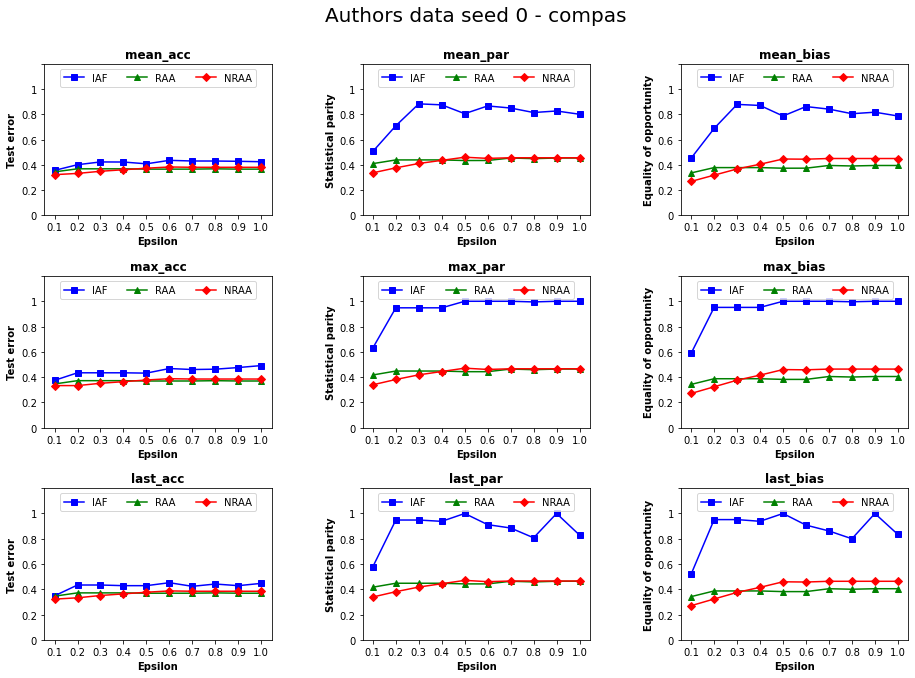

IAF                                        RAA  \
    Time taken in seconds Number of iterations Time taken in seconds   
0.1             66.236904                 78.0             24.636540   
0.2             51.599164                 58.0             23.912830   
0.3             75.812545                 98.0             20.296671   
0.4             67.443183                 88.0             22.951269   
0.5             25.165166                 28.0             17.191107   
0.6            104.599977                108.0             15.862599   
0.7             66.792494                 68.0             24.559738   
0.8             49.638801                 48.0             22.466474   
0.9             49.560540                 48.0             22.069595   
1.0             71.005558                 68.0             26.146106   

                                          NRAA                       
    Number of iterations Time taken in seconds Number of iterations  
0.1                 28.0            185.351200                 28.0  
0.2                 28.0            210.060155                 28.0  
0.3                 28.0            189.372537                 28.0  
0.4                 28.0            182.230510                 28.0  
0.5                 28.0            181.797261                 28.0  
0.6                 28.0            183.333268                 28.0  
0.7                 28.0            176.680843                 28.0  
0.8                 28.0            212.390266                 28.0  
0.9                 28.0            191.224286                 28.0  
1.0                 28.0            188.505907                 28.0

In [18]:
# methods = ["/IAF-", "/RAA-", "/NRAA-"]
# folder_measures = ["test_accs", "parities and biases"]
# measures = ["test_acc", "parity", "EO bias"]
# time_and_it = "time_and_it"
# time_and_it_columns = ["time_taken_seconds", "iteration"]

# plot_seed("compas", "Authors data seed 0", methods, folder_measures, measures, 
#           time_and_it, time_and_it_columns)